# 3小时入门numpy,pandas,matplotlib

## 一，numpy库

In [7]:
'1、创建array'
import numpy as np
a = np.array([t**2 for t in range(8)] )
b = np.zeros([2,2]) # 可以创建多维度数组
c = np.linspace(0,1,3)  #现性等分函数
d = np.array(range(8))
print(a,b,c,d)

[ 0  1  4  9 16 25 36 49] [[ 0.  0.]
 [ 0.  0.]] [ 0.   0.5  1. ] [0 1 2 3 4 5 6 7]


In [20]:
'2、访问array元素'
a = np.array([[1,2,4,5],[2,4,7,3],[2,5,3,9]])
# 访问第一行
print('第一行',a[0])
print('第一列',a[:,0])
print('切片', a[0][1:3])
print('切片', a[0][:-2])
print('切片', a[0][::2])
b = a>3 #返回 bool数组
c = copy(a[a>3])#利用bool数组选取元素
c

第一行 [1 2 4 5]
第一列 [1 2 2]
切片 [2 4]
切片 [1 2]
切片 [1 4]


array([4, 5, 4, 7, 5, 9])

In [10]:
'3、array 运算'
a = np.array([[1,2,4],[2,4,5],[3,5,2]])
b = np.array([1,2,3])
c = np.array([2,3,4])
print(b+c, b-c, b*c, b/2,b//2, b**2,b%2) #常见运算符重载
print('dim of a =', ndim(a)) #查看维度
print('shape of a = ', shape(a)) #查看大小
print('max of a =',a.max())
print('sum of a =',a.sum())
print(dot(b,c)) #点积
print(dot(a,b)) #矩阵乘法

[3 5 7] [-1 -1 -1] [ 2  6 12] [ 0.5  1.   1.5] [0 1 1] [1 4 9] [1 0 1]
dim of a = 2
shape of a =  (3, 3)
max of a = 5
sum of a = 28
20
[17 25 19]


In [12]:
'4、使用矩阵对象'
A = np.matrix([[1.0,2.0],[3.0,4.0]]) #创建矩阵
B = np.matrix(np.arange(1,3))
print('A=',A)
print('转置A.T=',A.T)
print('A的逆A.I=',A.I)
print('矩阵乘法A*A =',A*A)

A= [[ 1.  2.]
 [ 3.  4.]]
转置A.T= [[ 1.  3.]
 [ 2.  4.]]
A的逆A.I= [[-2.   1. ]
 [ 1.5 -0.5]]
矩阵乘法A*A = [[  7.  10.]
 [ 15.  22.]]


In [21]:
'5、使用ufunc函数'
# numpy中的 ufunc具有向量化特征，
# 且用c语言实现速度很快

x = np.linspace(0,np.pi,5)
y = np.sin(x)#np.sin(x) 作用到x的每一个元素

np.sin(x,x) #第二个参数表示将返回值赋给x本身

'frompyfunc函数可将普通python函数转换成ufunc函数'

def f(x):
    y = x if x>= 0 else 0
    return(y)

uf = np.frompyfunc(f,1,1)  #三个参数依次为 pyfun,nin,nout
z = uf([1,2,-1])   #返回结果数据元素类型是 object

#使用array对象的 astype方法将其转换成 np.float32
z.astype('f4') 

array([ 1.,  2.,  0.], dtype=float32)

## 二、pandas库

In [1]:
'1,Series对象'
import numpy as np
import pandas as pd
s = pd.Series([1,np.nan,6,8])
s.index = ['one','two','three','four']
print(s)
print(s.index)

one      1.0
two      NaN
three    6.0
four     8.0
dtype: float64
Index(['one', 'two', 'three', 'four'], dtype='object')


In [22]:
'2,用array创建DataFrame对象'
dates = pd.date_range('20130101',periods=3)  
df = pd.DataFrame(np.random.randn(3,4),
                  index=dates,columns=list('ABCD'))
df

A         B         C         D
2013-01-01 -0.807534 -0.171783 -0.575913  0.682260
2013-01-02 -0.145923 -0.830515  1.533675  0.413450
2013-01-03  0.649131 -0.587779 -0.126385 -1.928474

In [24]:
'3，导入excel文档创建DataFrame对象'
classmates = pd.read_excel('classmates.xlsx')
classmates.columns = ['name','age','gender']
classmates

name  age gender
0   李雷   22      男
1  韩梅梅   23      女
2   吉姆   21      男

In [25]:
'4,增加行'
classmates.loc[3] = {'name':'安妮','age':24,'gender':'女'}
classmates = classmates.append(pd.DataFrame([['丽丽','女','21']],\
             columns=classmates.columns),ignore_index=True)
# ignore_index=True 表示索引重置
classmates

name age gender
0   李雷  22      男
1  韩梅梅  23      女
2   吉姆  21      男
3   安妮  24      女
4   丽丽   女     21

In [26]:
'5,删除行'
# drop 和 append作用相反
classmates = classmates.drop([3,4]) # 删除并生成新的数据框 
classmates

name age gender
0   李雷  22      男
1  韩梅梅  23      女
2   吉姆  21      男

In [7]:
'6，增加列'
hobby = ['浪','耍','约']
classmates['hobby'] = hobby
height = [170,160,165]
classmates.insert(2,'height',height) # 插入到第3列
classmates

name age  height gender hobby
0   李雷  22     170      男     浪
1  韩梅梅  23     160      女     耍
2   吉姆  21     165      男     约

In [8]:
'7,删除列'
classmates = classmates.drop(['height'],axis = 1) 
del classmates['hobby']  #永久删除
classmates

name age gender
0   李雷  22      男
1  韩梅梅  23      女
2   吉姆  21      男

In [9]:
'8,移动列'
# 将 gender 移动到 age 前面
gender = classmates.pop('gender') # 先弹出
classmates.insert(1,'gender',gender) # 再插入到适当位置
classmates

name gender age
0   李雷      男  22
1  韩梅梅      女  23
2   吉姆      男  21

In [27]:
'9,排序'
classmates.sort_values(['name','age'],
                       ascending = [0,1]) #按列排序
classmates.sort_index()  #按索引排序

name age gender
0   李雷  22      男
1  韩梅梅  23      女
2   吉姆  21      男

In [12]:
'10,拼接'
friends = pd.DataFrame([['李雷','浪'],['大锤','约']],\
        columns = ['name','hobby'],index = ['LiLei','Dachui'])
classmates.index = ['LiLei','HanMeiMei','Ann']
friends = friends.drop(['name'],axis = 1)

# 使用 concat 函数拼接,纵向拼接
oldguys = pd.concat([classmates,friends],axis = 1,join='inner') 
oldguys

name gender age hobby
LiLei   李雷      男  22     浪

In [13]:
# 使用 join 方法拼接
oldguys = classmates.join(friends,how= 'inner')  
oldguys

name gender age hobby
LiLei   李雷      男  22     浪

In [15]:
'11,选取数据'
classmates.shape #查看形状'
classmates.head(3) #前3行
classmates.tail(3) #后3行
classmates[1:3] #选择多行
classmates['LiLei':'Ann'] #选择多行
classmates.name #提取一列返回series
classmates[['name','age']] #选择多列
classmates.loc['LiLei':'Ann',:] #用标签查看数据
classmates.iloc[0:2,:] #用下标查看数据

#布尔索引
classmates[(classmates['age']>22) & (classmates.age<24)] 

name gender age
HanMeiMei  韩梅梅      女  23

In [28]:
'12,导出到csv和 excel 文档'
classmates.to_csv('myclassmates.csv')
# 使用writer 可以在一个excel文档里写多个表格

# 导出dataframe到指定sheet
classmates.to_excel('myclassmates.xlsx','sheet2')

# 导出多个dataframe到同一个excel表格多个sheet
friends = classmates[0:1].copy()
writer = pd.ExcelWriter("oldguys.xlsx")
classmates.to_excel(writer,sheet_name = "classmates")
friends.to_excel(writer,sheet_name = "friends")
writer.save()

In [29]:
'13,常用统计函数'
import pandas as pd
import numpy as np
dates = pd.date_range('20170501',periods=6)
df = pd.DataFrame(data=np.random.randn(6,5),
                  index = dates,columns = list('ABCDE'))
df.describe()

A         B         C         D         E
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean  -0.369763 -0.517788 -0.950100 -0.294953  0.153838
std    1.025086  1.186573  0.710690  0.848069  0.942500
min   -1.425065 -1.700938 -1.973642 -1.205523 -1.477654
25%   -1.082210 -1.525232 -1.252437 -0.945107 -0.061296
50%   -0.652042 -0.649557 -0.980377 -0.231903  0.177644
75%    0.226716  0.159028 -0.661745 -0.064151  0.875445
max    1.216534  1.281890  0.132455  1.090688  1.078291

In [30]:
df.mean() #求每列平均
df.sum(1) #按行求和 

df.apply(max,1) #求每行最大值

MaxDrawDown = lambda x:min([(x[i]-max(x[0:i+1])+0.0)/max(x[0:i+1]) \
         for i in range(len(x))]) #定义最大回撤函数
df.apply(MaxDrawDown) #调用lamda函数

formatdf = df.applymap(lambda x:format(x, '.2%')) #转换成百分数显示
formatdf

A         B         C         D         E
2017-05-01   -70.88%  -166.32%    13.25%  -116.74%    -6.33%
2017-05-02   121.65%  -170.09%   -99.27%   109.07%    41.05%
2017-05-03  -142.51%   128.19%  -197.36%  -120.55%   107.83%
2017-05-04   -59.53%   -18.78%  -133.90%   -18.55%    -5.52%
2017-05-05    50.07%  -111.13%   -55.97%   -27.83%   103.04%
2017-05-06  -120.67%    27.46%   -96.80%    -2.37%  -147.77%

In [31]:
dfchange = df.pct_change()  #求每日变化比例
dfchange.fillna(0)

A         B         C         D          E
2017-05-01  0.000000  0.000000  0.000000  0.000000   0.000000
2017-05-02 -2.716441  0.022692 -8.494788 -1.934302  -7.483921
2017-05-03 -2.171414 -1.753637  0.988106 -2.105286   1.626600
2017-05-04 -0.582243 -1.146483 -0.321555 -0.846101  -1.051229
2017-05-05 -1.841099  4.918441 -0.582041  0.499916 -19.653476
2017-05-06 -3.409866 -1.247116  0.729702 -0.914862  -2.434035

count	            非 NA 值的数量
describe	        针对 Series 或 DF 的列计算汇总统计
min , max	        最小值和最大值
idxmin , idxmax	    最小值和最大值的索引值
quantile	        样本分位数（0 到 1）
sum	                求和
mean	            均值
median       	    中位数
mad	                根据均值计算平均绝对离差
var	                方差
std	                标准差
skew	            样本值的偏度（三阶矩）
kurt	            样本值的峰度（四阶矩）
cumsum	            样本值的累计和
cummin , cummax	    样本值的累计最大值和累计最小值
cumprod	            样本值的累计积
diff	            计算一阶差分
pct_change	        计算百分数变化

In [34]:
'14,时间格式'
import time
import datetime
import pandas as pd
q = pd.datetime(2012,3,21)
p = pd.datetime.today() #datetime对象时间

#strftime将对象时间转换成字符串时间
qstr = q.strftime("%Y-%m-%d %H:%M:%S") 
ptup = pd.datetime.timetuple(p) #转换成tumple时间

#striptime将字符串时间转换成tumple时间
qtup = time.strptime(qstr, "%Y-%m-%d %H:%M:%S") 
qstamp = time.mktime(qtup) #转换成时间戳
pstamp = time.mktime(ptup) 

#计算两天的时间间隔
ndays = int((pstamp - qstamp)/(3600*24))
ndays

2314

## 三、matplotlib 库

matplotlib 支持函数式绘图和面向对象绘图两种绘图方式。


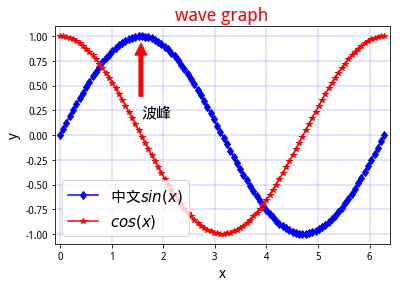

In [39]:
'1，折线图—————函数式绘图示范'
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi,100,endpoint=True)
y = np.sin(x)
x2 = x;y2 = np.cos(x2)
plt.plot(x,y,'b-d',label='中文$sin(x)$')  
plt.plot(x2,y2,'r-*',label='$cos(x)$') 
plt.xlabel('x',fontsize=14);plt.ylabel('y',fontsize=14)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.title('wave graph',fontsize=18,color='r', weight='light' )
plt.xlim(min(x)-0.1,max(x)+0.1)
plt.ylim(min(y)-0.1,max(y)+0.1)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.legend(loc='best',fontsize = 15) ##最优化标签位置
plt.annotate('波峰',xy=[np.pi/2,1],xycoords='data',xytext=(-0,-80),
             arrowprops=dict(color='red',shrink=0.1),
             textcoords='offset points',fontsize = 15,color = 'black')
savefig('demo.jpg');


#### 1，控制颜色

颜色之间的对应关系为
b---blue   c---cyan  g---green    k----black
m---magenta r---red  w---white    y----yellow

有四种表示颜色的方式
a:用英文全名如：purple                b: 用16进制如：#FF00FF  
c:用RGB或RGBA元组（1,0,1,1）          d：灰度强度如：‘0.7’

#### 2，控制线型

符号和线型之间的对应关系为
-      实线                         --     短线
-.     短点相间线                    ：     虚点线

#### 3，控制标记风格

.  Point marker                     ,  Pixel marker
o  Circle marker                    +  Plus marker
v  Triangle down marker             ^  Triangle up marker 
<  Triangle left marker             >  Triangle right marker 

1  Tripod down marker               2  Tripod up marker
3  Tripod left marker               4  Tripod right marker

s  Square marker                    p  Pentagon marker
*  Star marker                      x  Cross (x) marker
h  Hexagon marker                   H  Rotated hexagon                 
D Diamond marker                    d  Thin diamond marker             
| Vertical line marker              _  Horizontal line marker      

r'$\sqrt{2}$'   any Latex expression

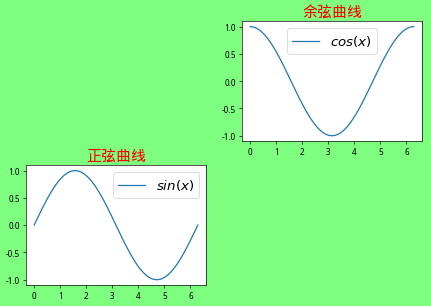

In [40]:
'1，折线图—————面向对象绘图示范'
import matplotlib.pyplot as plt
%matplotlib inline
#设置图片大小和像素
myfig = plt.figure(2,figsize=(6,4),dpi=60) 
#使用图像坐标添加子图相对位置
ax1 = myfig.add_axes([0,0.3,0.5,0.5]) 
# [x坐标起点，y坐标起点，x图宽，y图宽]
ax2 = myfig.add_axes([0.6,0.9,0.5,0.5]) 
x = np.linspace(0,2*np.pi,100,endpoint=True)
y = np.sin(x)
ax1.plot(x,np.sin(x),label='$sin(x)$')
ax1.set_title('正弦曲线',color='red',fontsize =18)
ax1.legend(loc='best',fontsize=16)
ax2.plot(x,np.cos(x),label='$cos(x)$')
ax2.set_title('余弦曲线',color='red',fontsize =18)
ax2.legend(loc='best',fontsize=16)
myfig.set_facecolor([0,1,0,0.5])

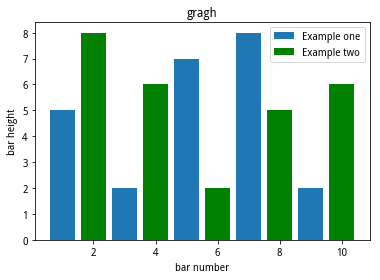

In [42]:
'2,条形图'
import numpy as np;import pandas as pd 
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.xlabel('bar number');plt.ylabel('bar height')
plt.title('gragh')
plt.legend();

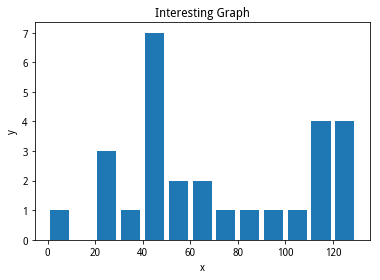

In [47]:
'3,分布柱状图'
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,
    120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)
plt.xlabel('x');plt.ylabel('y')
plt.title('Interesting Graph');

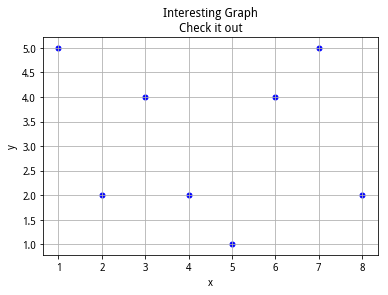

In [49]:
'4,散点图'
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

plt.scatter(x,y, label='skitscat', color='b', s=25)

plt.xlabel('x');plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.grid()
plt.show()

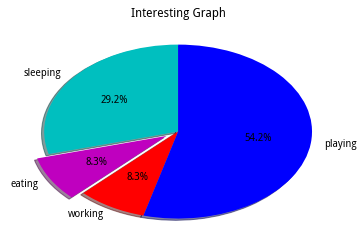

In [50]:
'5,饼图'
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,labels=activities,colors=cols,
        startangle=90,shadow= True,explode=(0,0.1,0,0),
        autopct='%1.1f%%')

plt.title('Interesting Graph');
plt.show()

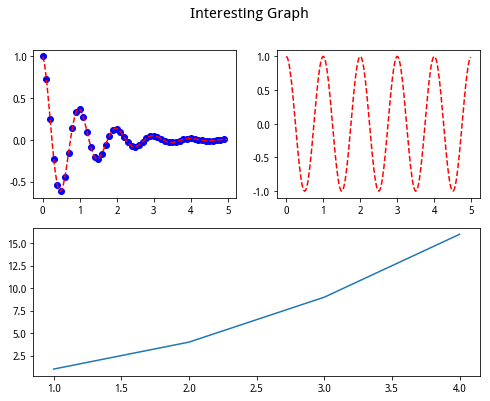

In [53]:
'6，绘制子图'

def f(t):return np.exp(-t) * np.cos(2 * np.pi * t)  
t1 = np.arange(0, 5, 0.1) ;t2 = np.arange(0, 5, 0.02)   
plt.figure(10,figsize=[8,6])  
plt.subplot(221)  #分成2x2，占用第一个，即第一行第一列的子图
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')  
plt.subplot(222)  #分成2x2，占用第二个，即第一行第二列的子图
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')  
plt.subplot(212)  #分成2x1，占用第二个，即第二行
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.suptitle('Interesting Graph',fontsize = 15)
plt.show()

## Python 教程 http://www.cnblogs.com/chaosimple/p/4153083.html